<a href="https://colab.research.google.com/github/cyrus2281/notes/blob/main/MachineLearning/Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content

>[Content](#scrollTo=lNJVlBSleb9C)

>[Supervised Machine Learning](#scrollTo=dBVtPOeqee8j)

>>[K-Nearest Neighbor](#scrollTo=GiFmXSDcfvBK)

>>>[Python Implementation](#scrollTo=pclzB7I9ON6D)

>>>[KNN can fail](#scrollTo=Gn6xvWSBRAH-)

>>[Bayes Classifier](#scrollTo=rYLOrTXKU3ov)

>>>[Probability Density](#scrollTo=DbCHAW1mVXa4)

>>>[Multi-Dimensional Gaussian](#scrollTo=B8Ac4aa0Xpa8)

>>>[Bayes Rule](#scrollTo=Wli3S-EbZipv)

>>>[Binomial Distribution](#scrollTo=ZUfMbkeTmlqS)

>>>[Bernoulli  Distribution](#scrollTo=QtN01vx8n8G2)



# Supervised Machine Learning

**Supervised ML:**
- Give X (inputs), Y (targets)
- Try to learn to predict target given input
- 2 main functions: `train(X,Y)` and `predict(X)`

**Unsupervised ML:**
- Given X only
- Try to learn structure of the data, density estimation (`p(x)`), clustering

Supervised learning can be categorized further:

**Classification**
- Labels are discrete
  - Whether or not it will rain tomorrow
  - Whether or not Google's stock price will rise or fall tomorrow

**Regression**
- Labels are real numbers
  - Trying to predict amount of rainfall tomorrow
  - Trying to predict the value of Google's stock price

**Data types and shapes**

- X is a matrix of shape N×D
- N = number of samples
- D = number of features
- Y is a vector of shapes N×1
  - Regression: will contain float values
  - Classification: will contain integers from 0…K-1, where K = number of classes

**Generalization and Overfitting**

- Generalization: Predict accurately not only for data we trained on, but new data we haven't seen before

- Usually split data into train/test sets to get an idea of how well a model will generalize

- This is only "pretend" test data since "real" test data we won't know the answer to (i.e. tomorrow's stock price)

- If we get 100% accuracy on training data, but only 55% accuracy on test data, that's a sign of "overfitting"

## K-Nearest Neighbor

To make a prediction, use closest knwon data points.

K is the number of neighbors which is a hyperparameter.

KNN is known as a **lazy classifier**. `train(X,Y)` doesn't do anything, just stores X and Y. `predict(X')` does all the work by looking through the stored X and Y.

Smaller value of `K` are more expressive/sensitive, where as larger values of `K` are more simple/smooth.

### Python Implementation

In [11]:
# This is an example of a K-Nearest Neighbors classifier on MNIST data.
# https://deeplearningcourses.com/c/data-science-supervised-machine-learning-in-python


import numpy as np
import matplotlib.pyplot as plt
from sortedcontainers import SortedList
from datetime import datetime

class KNN(object):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        y = np.zeros(len(X))
        for i,x in enumerate(X): # test points
            sl = SortedList() # stores (distance, class) tuples
            for j,xt in enumerate(self.X): # training points
                diff = x - xt
                d = diff.dot(diff)
                if len(sl) < self.k:
                    # don't need to check, just add
                    sl.add( (d, self.y[j]) )
                else:
                    if d < sl[-1][0]:
                        del sl[-1]
                        sl.add( (d, self.y[j]) )
            # vote
            votes = {}
            for _, v in sl:
                votes[v] = votes.get(v,0) + 1

            max_votes = 0
            max_votes_class = -1
            for v,count in votes.items():
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
            y[i] = max_votes_class
        return y

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

In [13]:
def get_xor():
    X = np.zeros((200, 2))
    X[:50] = np.random.random((50, 2)) / 2 + 0.5 # (0.5-1, 0.5-1)
    X[50:100] = np.random.random((50, 2)) / 2 # (0-0.5, 0-0.5)
    X[100:150] = np.random.random((50, 2)) / 2 + np.array([[0, 0.5]]) # (0-0.5, 0.5-1)
    X[150:] = np.random.random((50, 2)) / 2 + np.array([[0.5, 0]]) # (0.5-1, 0-0.5)
    Y = np.array([0]*100 + [1]*100)
    return X, Y

def get_donut():
    N = 200
    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    return X, Y

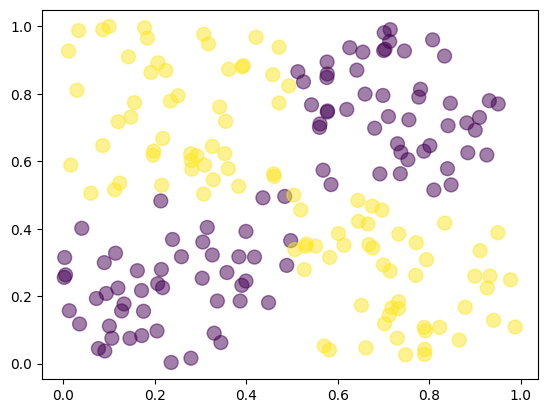

Accuracy: 0.98


In [14]:
X, Y = get_xor()

# display the data
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

# get the accuracy
model = KNN(3)
model.fit(X, Y)
print("Accuracy:", model.score(X, Y))

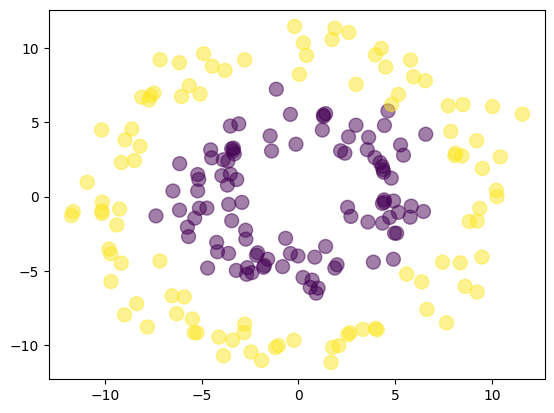

Accuracy: 1.0


In [15]:
X, Y = get_donut()

# display the data
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

# get the accuracy
model = KNN(3)
model.fit(X, Y)
print("Accuracy:", model.score(X, Y))

### KNN can fail

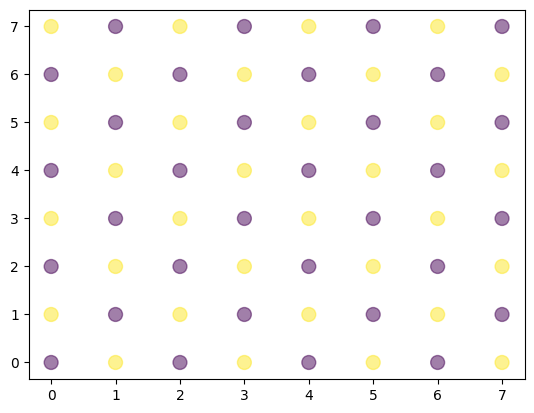

Train accuracy: 0.0


In [12]:
def get_data():
    width = 8
    height = 8
    N = width * height
    X = np.zeros((N, 2))
    Y = np.zeros(N)
    n = 0
    start_t = 0
    for i in range(width):
        t = start_t
        for j in range(height):
            X[n] = [i, j]
            Y[n] = t
            n += 1
            t = (t + 1) % 2 # alternate between 0 and 1
        start_t = (start_t + 1) % 2
    return X, Y


X, Y = get_data()

# display the data
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

# get the accuracy
model = KNN(3)
model.fit(X, Y)
print("Train accuracy:", model.score(X, Y))

## Bayes Classifier

Bayes Classifier is rooted in probability.


### Probability Density

The height of the curve is not a probability, it's a probability density.

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

`f(x)` is called PDF (probability density function)

- Note: For discrete variables we use PMF (probability mass function)

Bayes classifier (and Bayes rule) treats PDFs and PMFs the same way.

### Multi-Dimensional Gaussian

$$
f(x) = \frac{1}{\sqrt{(2\pi)^D|\Sigma|}}
e^{
  -\frac{1}{2}(x-\mu)^T
  \Sigma^{-1}(x-\mu)
  } \\[1cm]
\mu = \frac{1}{N} \sum_{i=1}^N x_i \\
\Sigma = \frac{1}{N-1} \sum_{i=1}^N (x_i - \mu)(x_i-\mu)^T
$$

- D = size of X = size of mean
- |𝚺| = D×D

### Bayes Rule

`p(y|x)` is the probability that y is some class, given the input feature x

$$
p(y|x) = \frac{p(x|y)\ p(y)}{p(x)}
$$

To get `p(x)`, we can use bayes rule again

$$
p(x,y) = p(x|y)p(y) \\
p(x) = \sum_y p(x,y)
$$

eg:

$
p(x) = p(x|y=0)p(y=0) + p(x|y=1)p(y=1)\\
$

\

- p(y|x) = Posterior
- p(x|y) = Likelihood
- p(y) = Prior
- p(x) = Evidence

For high dimensional data (eg D=1000), we can work with the log probabilities instead.

$$
\log(AB) = \log(A) + \log(B)
$$

since log() is monotonically increasing, the argmax rule produces the same result

$$
A > B, \log(A) > \log(B)\\
$$

$$
k^* = \text{argmax}_k \{
  \log p(x|y=k) + \log p(y=k)
  \} \\
$$


log PDFs are faster to calculate than PDF


### Binomial Distribution

If we have two discrete values, instead of the Gaussian distribution, we'd use the Binomial distribution.

$$
f(k) =  \binom{n}{k} \theta^k (1-\theta)^{n-k} \\
$$

- f(k) is a PMF (probability mass function)
- Unlike PDFs, the PMF returns an actual probability
- θ is the probability of success in a signl trial

For more than 2 discrete values, we can use multinomial distribution.





### Bernoulli  Distribution

If we only care about if something happens or not (boolean), we can used the Bernoulli  distribution

$$
f(k) = \theta^{1(k=1)}(1-\theta)^{1(k=0)} \\
$$

Probability of all outcomes sums up to one.